In [67]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [ ]:
def z_score(sample_mean, pop_mean, pop_std_deviation, size):
    z = ( sample_mean - pop_mean ) / (pop_std_deviation / np.sqrt(size))
    
    return z

def t_score(sample_mean, pop_mean, sample_std_deviation, size):
    t = ( sample_mean - pop_mean ) / (sample_std_deviation / np.sqrt(size))
    
    return t
    t = stats.ttest_1samp(data, pop_mean)

In [5]:
def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    if sigma:
        z_score = (np.mean(data_sample)-mu)/(sigma/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    elif len(data_sample) > 30:
        z_score = (np.mean(data_sample)-mu)/(np.std(data_sample)/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    else:
        t, p = stats.ttest_1samp(data_sample, mu)
    
    if p < significant_level:
        print('reject null hypothesis')
        
    else:
        print('accept null hypothesis')

# Confidence Interval

In [21]:

# L = xbar - Z1-a/2 * o/sqrt(n)
def get_lower_bound(sample_mean, sample_size, pop_std_div, significant_lvl):
    z_sub_alpha = norm.ppf(1-(significant_lvl/2))
    
    return sample_mean - z_sub_alpha * pop_std_div / np.sqrt(sample_size)

# U = xbar + Z1-a/2 * o/sqrt(n)
def get_upper_bound(sample_mean, sample_size, pop_std_div, significant_lvl):
    z_sub_alpha = norm.ppf(1-(significant_lvl/2))
    
    return sample_mean + z_sub_alpha * pop_std_div / np.sqrt(sample_size)
    

In [24]:
df = pd.read_csv("datasets/Iris.csv")

# features (4), records (150), plants (3)
pop_std_div = 0.3525

iris_setosa_sepal = np.array(df[df.Species == "Iris-setosa"].SepalLengthCm)

sample_mean = iris_setosa_sepal.mean()

L = get_lower_bound(sample_mean, len(iris_setosa_sepal), pop_std_dev, 0.05)
U = get_upper_bound(sample_mean, len(iris_setosa_sepal), pop_std_dev, 0.02)

display(L, U)

4.908293780383348

5.1219708331778895

In [37]:
def detect_remove_outliers(data):
    sample = np.array(list(data))
    sample_mean = np.mean(sample)
    sample_std_dev = np.std(sample, ddof=1)
    outlier_upper_bound = sample_mean + 3 * sample_std_dev
    outlier_lower_bound = sample_mean - 3 * sample_std_dev
    
    no_outliers = []
    outliers = []
    for a_sample in sample:
        if a_sample > outlier_upper_bound or a_sample < outlier_lower_bound:
            outliers.append(a_sample)
        else:
            no_outliers.append(a_sample)
        
    return outliers, no_outliers

df = norm.rvs(loc=5, scale=200, size=10_000)

n, m = detect_remove_outliers(df)

display(len(n), len(m))

23

9977

# IQR

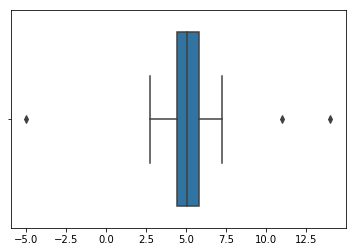

In [69]:
x = np.concatenate((norm.rvs(loc=5, scale=1, size=100), np.array([-5, 11, 14])))

def iqr(data):
    percentile_25 = np.percentile(data, 25)
    percentile_75 = np.percentile(data, 75)
    iqr = percentile_75 - percentile_25
    
    no_outliers = []
    outliers = []
    for a_sample in data:
        if a_sample > percentile_75 or a_sample < percentile_25:
            outliers.append(a_sample)
        else:
            no_outliers.append(a_sample)
        
    return outliers, no_outliers
    
iqr(x)

import seaborn as sns

sns.boxplot(x)
